### Importing Packages

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Q4
Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [36]:
#Importing and previewing the CSV 

gdp_df = pd.read_csv('../data/gdp_percapita.csv')

gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


# Q5
How many rows and columns are in gdp_df? What are the data types of each column?

In [37]:
#Finding # rows/columns and data types

gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


# Answer: 
4 columns, 7662 rows. Data types are object, int64, and float64.

# Q6
Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [38]:
gdp_df = gdp_df.drop(columns='Value Footnotes')\
               .rename(columns={'Country or Area':'Country', 
                                'Value':'GDP_Per_Capita'})

gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


# Q7
How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [39]:
#Count of years for each country

#Creating series that counts # unique years for each country, turning the series into a DataFrame and naming columns

num_years = gdp_df.groupby('Country')['Year']\
                  .count()\
                  .to_frame()\
                  .rename(columns={'Year':'Num_Years'})\
                  .reset_index()

#Should I be setting index to column?

In [40]:
#Number of countries with data for all years

#Finding number of years in dataset

max_years = num_years['Num_Years'].max()

#Subsetting to find countries with 33 unique years of data

all_years = num_years[num_years['Num_Years'] == max_years]

all_years

,Country,Num_Years
1,Africa Eastern and Southern,33
2,Africa Western and Central,33
3,Albania,33
4,Algeria,33
5,Angola,33
...,...,...
236,Vanuatu,33
237,Viet Nam,33
239,World,33
240,Zambia,33


In [41]:
#Countries with missing years, sorted with most missing data at the top

#Subsetting to find countries with missing years (<33), and sorting to view most missing data at the top

missing = num_years[num_years['Num_Years'] < max_years].sort_values('Num_Years')

missing.head(10)

,Country,Num_Years
53,Djibouti,10
197,Somalia,10
225,Turks and Caicos Islands,12
192,Sint Maarten (Dutch part),14
112,Kosovo,15
36,Cayman Islands,16
154,Nauru,19
0,Afghanistan,20
47,CuraÃ§ao,22
213,SÃ£o TomÃ© and Principe,22


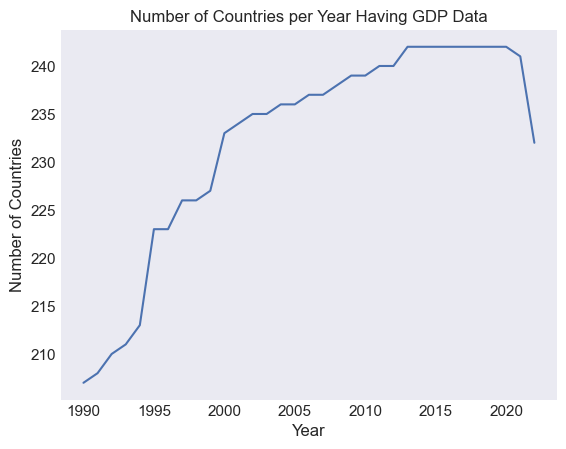

In [42]:
#Number of observations per year

#Creating series, turning into DataFrame, and renaming columns

countries_per_year = gdp_df.groupby('Year')['Country'].count().to_frame().rename(columns={'Country':'Num_Countries'})

#Setting a style

plt.style.use('seaborn-v0_8-dark')

#Plotting

plt.plot(countries_per_year.index, countries_per_year.Num_Countries)
plt.title('Number of Countries per Year Having GDP Data')
plt.ylabel('Number of Countries')
plt.xlabel('Year')
plt.show()

# Answer:
Countries with data for all 33 years: 202

Countries missing many years of data: Djibouti and Somalia are missing the most years

See plot for # observations per year

# Q8
In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [43]:
#Subsetting to 2020 data

gdp2020 = gdp_df[gdp_df['Year'] == 2020]

#Setting theme

sns.set_theme(style='dark')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


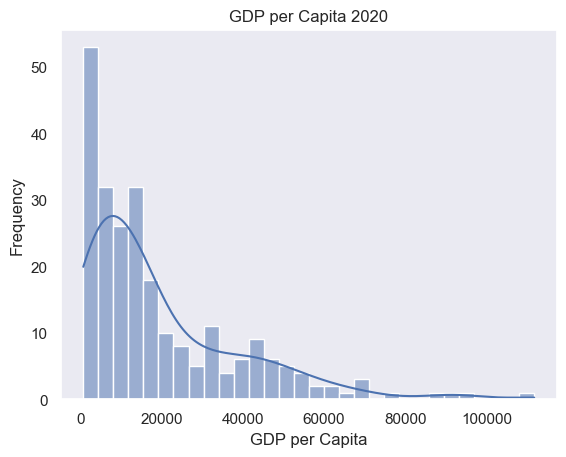

In [44]:
#Histogram

sns.histplot(data=gdp2020, 
             x='GDP_Per_Capita', 
             bins=30, 
             kde=True)\
   .set(title='GDP per Capita 2020', 
        xlabel='GDP per Capita', 
        ylabel='Frequency')

plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


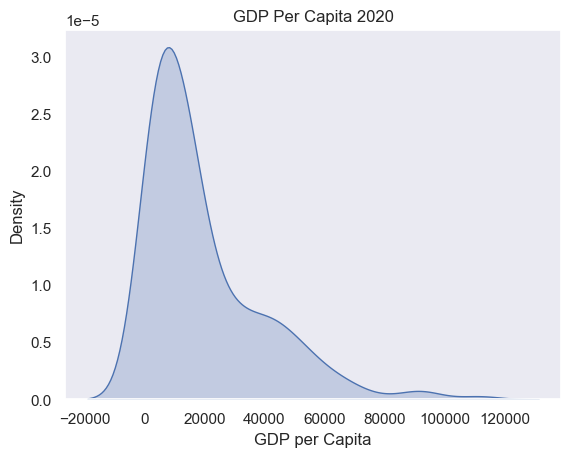

In [45]:
#Density Plot

sns.kdeplot(gdp2020['GDP_Per_Capita'], 
            fill=True)\
   .set(title='GDP Per Capita 2020', 
        xlabel='GDP per Capita', 
        ylabel='Density')

plt.show()

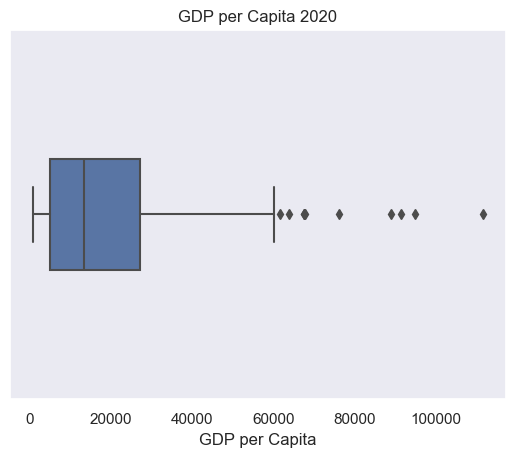

In [46]:
#Boxplot

sns.boxplot(x=gdp2020['GDP_Per_Capita'], 
            width=0.3)\
   .set(title='GDP per Capita 2020', 
        xlabel='GDP per Capita')

plt.show()

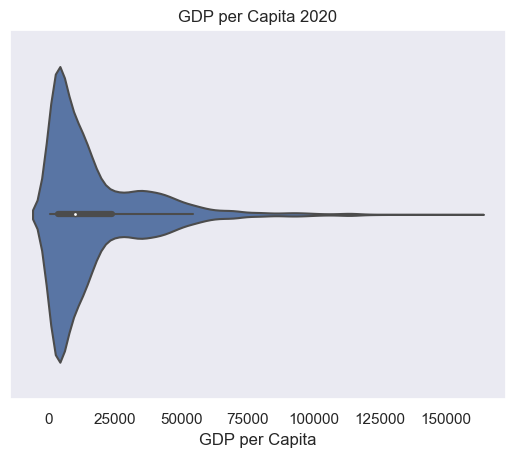

In [47]:
#Violin Plot

sns.violinplot(x=gdp_df['GDP_Per_Capita'])\
   .set(title='GDP per Capita 2020', 
        xlabel='GDP per Capita')

plt.show()

# Answer:
Histograms and density plots show the distribution shapes, while boxplots and violin plots show information about central tendency, variability, and outliers within the distribution. Violin are a great middle ground, combining the detailed distribution shape of density plots with the summary statistics of boxplots.

# Q9
What was the median GDP per capita value in 2020?

In [48]:
gdp2020['GDP_Per_Capita'].median()

13357.997573370474

# Answer:
$13,357.99

# Q10
For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

- A boxplot
- A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
- A scatterplot
- A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)

Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [49]:
#Subsetting the data

gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]

#Setting the theme

sns.set_theme(style='dark')

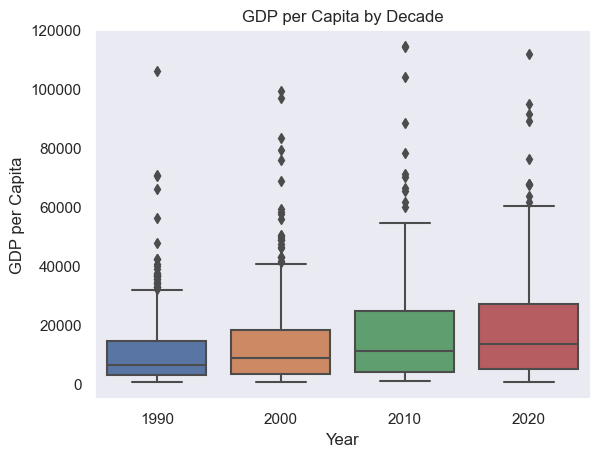

In [50]:
#Boxplot

sns.boxplot(x=gdp_decades['Year'], 
            y=gdp_decades['GDP_Per_Capita'])\
   .set(title='GDP per Capita by Decade', 
        xlabel='Year', 
        ylabel='GDP per Capita')

plt.show()

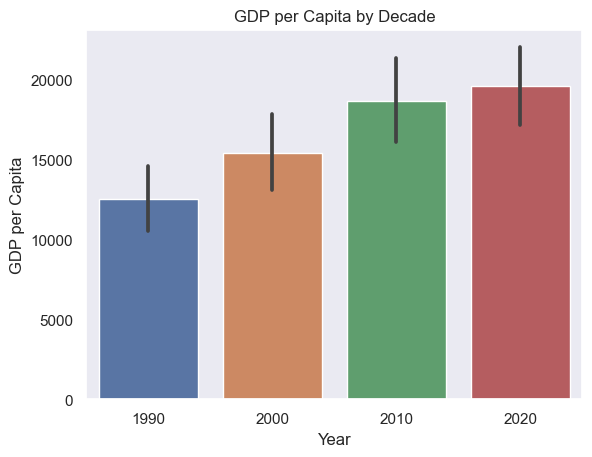

In [51]:
#Barplot

sns.barplot(x=gdp_decades['Year'], 
            y=gdp_decades['GDP_Per_Capita'])\
   .set(title='GDP per Capita by Decade', 
        xlabel='Year', 
        ylabel='GDP per Capita')

plt.show()

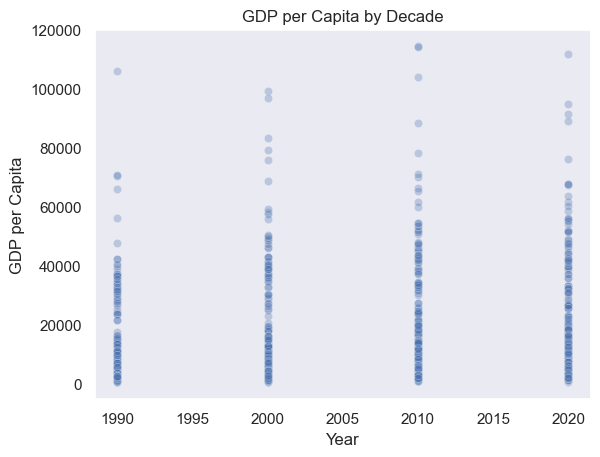

In [52]:
#Scatterplot

sns.scatterplot(x=gdp_decades['Year'], 
                y=gdp_decades['GDP_Per_Capita'], 
                alpha=.3)\
   .set(title='GDP per Capita by Decade', 
        xlabel='Year', 
        ylabel='GDP per Capita')

plt.show()

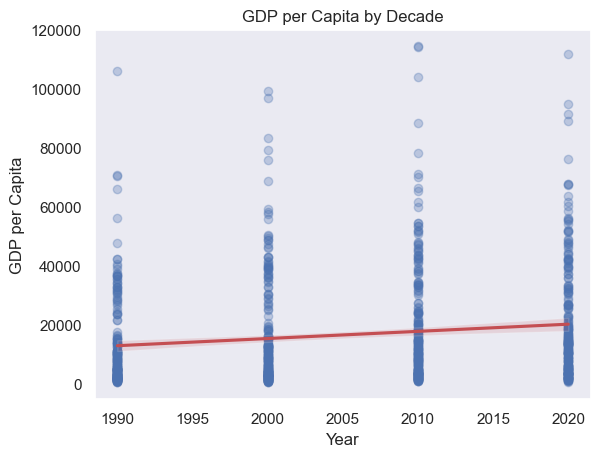

In [53]:
#Scatterplot with trendline

sns.regplot(x=gdp_decades['Year'], 
            y=gdp_decades['GDP_Per_Capita'], 
            scatter_kws={"alpha": 0.3}, 
            line_kws={"color": "r"})\
    .set(title='GDP per Capita by Decade', 
        xlabel='Year', 
        ylabel='GDP per Capita')

plt.show()

# Answer:
GDP is increasing over time.
Boxplot: Highlights key summary statistics like median, IQR, quartiles, and outliers, so it is useful for comparing distributions. However, it may oversimplify data and hide finer details - for example it doesn't show individual data points.
Barplot: Effectively shows differences across categories but not ideal for visualizing trends over time, better for categorical data. It also does not show much in the way of summary statistics.
Scatterplot: Great for exploring relationships between two numerical variables but less suitable for displaying trends over time, especially when time is treated as a numeric variable. The trendline is helpful but this is still not the correct type of plot for the data.

# Q11
Which country was the first to have a GDP per capita greater than $100,000?

In [61]:
#Subsetting for >100k, sorting by year ascending and viewing the first row

gdp_df[gdp_df['GDP_Per_Capita'] > 100000].sort_values('Year').head(1)

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059


# Answer:
United Arab Emirates

# Q12
Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [66]:
#Sorting 2020 DataFrame by GDP descending and viewing the first row to find the highest GDP

gdp2020.sort_values('GDP_Per_Capita', ascending=False).head(1)

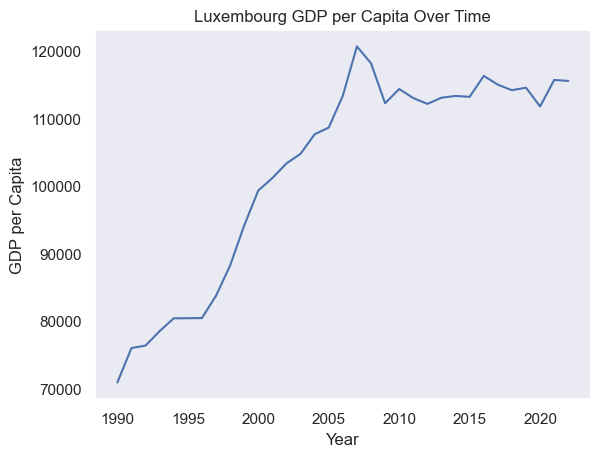

In [70]:
# Subsetting for Luxembourg

gdp_lux = gdp_df[gdp_df['Country'] == 'Luxembourg']

#Creating a plot

plt.plot(gdp_lux.Year, gdp_lux.GDP_Per_Capita)
plt.title('Luxembourg GDP per Capita Over Time')
plt.ylabel('GDP per Capita')
plt.xlabel('Year')
plt.show()

# Answer:
Luxembourg

# Q13
Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [71]:
#Sorting 2020 DataFrame by GDP ascending and viewing the first row to find the lowest GDP

gdp2020.sort_values('GDP_Per_Capita').head(1)

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263


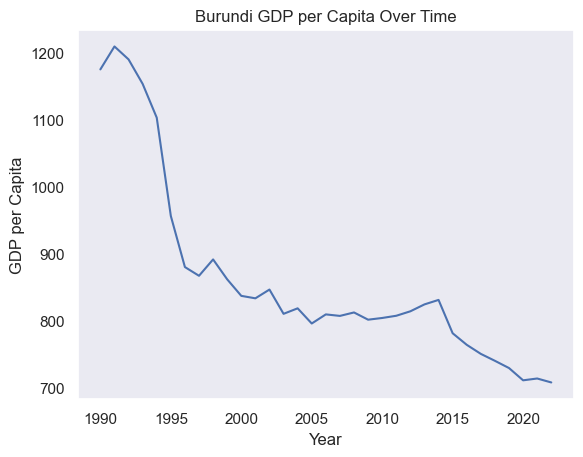

In [72]:
# Subsetting for Burundi

gdp_burundi = gdp_df[gdp_df['Country'] == 'Burundi']

#Creating a plot

plt.plot(gdp_burundi.Year, gdp_burundi.GDP_Per_Capita)
plt.title('Burundi GDP per Capita Over Time')
plt.ylabel('GDP per Capita')
plt.xlabel('Year')
plt.show()

# Q13 Bonus

In [91]:
#Filtering to 1990 and 2020, then creating a pivot table to compare years

gdp_1990_2020 = gdp_df[gdp_df['Year'].isin([1990, 2020])]\
                                     .pivot(index='Country', 
                                            columns='Year', 
                                            values='GDP_Per_Capita')

#Adding a Boolean column to identify if a country's GDP increased from 1990 to 2020

gdp_1990_2020['GDP_Increase'] = gdp_1990_2020[2020] > gdp_1990_2020[1990]

In [103]:
#Subsetting to see countries that increased, then counting how many

gdp_1990_2020[gdp_1990_2020['GDP_Increase'] == True].count()['GDP_Increase']

188

In [105]:
#Subsetting to see countries that decreased, then counting how many

gdp_1990_2020[gdp_1990_2020['GDP_Increase'] == False].count()['GDP_Increase']

54

In [106]:
#Here are the countries that did not increase GDP from 1990 to 2020

gdp_1990_2020[gdp_1990_2020['GDP_Increase'] == False]

Year,1990,2020,GDP_Increase
Country,,,
Afghanistan,NaN,1968.341002,False
Barbados,14097.395550,13805.777541,False
Bosnia and Herzegovina,NaN,14587.481737,False
Brunei,70358.724094,61603.550804,False
Burundi,1175.155086,711.355263,False
Cambodia,NaN,4276.184539,False
Cayman Islands,NaN,67530.693800,False
Central African Republic,1200.613390,847.765012,False
Congo,5007.319245,3384.654335,False


# Answer: 
Burundi

# Bonus:
From 1990 to 2020, 188 countries increased GDP while 54 countries did not. So yes, countries typically increased GDP over this time period. You can see the exceptions in the output above.

# Q14
Read in the internet use dataset into a DataFrame named internet_df. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

# Q15
Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

# Q16
Look at the number of observations in this dataset per year. What do you notice?

# Q17 
What is the first year to have a non-zero internet users percentage value?

# Q18
How does the distribution of internet users percent differ for 2000 and 2014?

# Questions & To Do

FutureWarnings - ignore?

Formatting
